<a href="https://colab.research.google.com/github/byunsy/heart-disease-diagnosis/blob/main/Heart_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Classification


---



## 01. Import Packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## 02. Upload Dataset

Upload the dataset (heart_disease.zip) and unzip it.

In [3]:
!unzip /content/heart_disease.zip

Archive:  /content/heart_disease.zip
  inflating: heart.csv               


## 03. Understanding the Data

Read the csv file as a dataframe.

In [4]:
df = pd.read_csv("/content/heart.csv")

Let's see what kind of data we have.

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The dataset includes a total of **14 attributes**:

- **age**: The person's age in years

- **sex**: The person's sex (1 = male, 0 = female)

- **cp**: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

- **trestbps**: The person's resting blood pressure (mm Hg on admission to the hospital)

- **chol**: The person's cholesterol measurement in mg/dl

- **fbs**: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

- **restecg**: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

- **thalach**: The person's maximum heart rate achieved

- **exang**: Exercise induced angina (1 = yes; 0 = no)

- **oldpeak**: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

- **slope**: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

- **ca**: The number of major vessels (0-3)

- **thal**: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

- **target**: Heart disease (0 = no, 1 = yes)

In [6]:
print("Total number of patient data:" , len(df))

Total number of patient data: 303


We have a total of 303 patient data included in this dataset, which is considered fairly small. 

For readability, we will change the column names so that they can be more easily understood. 

In [7]:
df.columns = ['age', 
              'sex', 
              'chest_pain_type', 
              'resting_blood_pressure', 
              'cholesterol', 
              'fasting_blood_sugar', 
              'rest_ecg', 
              'max_heart_rate_achieved',
              'exercise_induced_angina', 
              'st_depression', 
              'st_slope', 
              'num_major_vessels', 
              'thalassemia', 
              'target']

## 04. Explore the Dataset

TOTAL NUMBER OF PATIENTS       : 303
Patients with    heart disease : 165
Patients without heart disease : 138



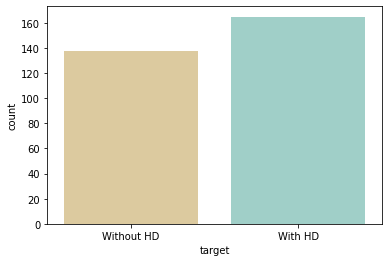

In [8]:
print("TOTAL NUMBER OF PATIENTS       :", len(df))
print("Patients with    heart disease :", df.target.value_counts()[1])
print("Patients without heart disease :", df.target.value_counts()[0])
print()

sns.countplot(x='target', data=df, palette='BrBG')
plt.xticks(ticks=[0, 1], labels=['Without HD', 'With HD'])

plt.show()

We see that we have an approximately even balance between two target groups.

In [9]:
# Male Patients
male_table = df[df.sex == 1]
male_count = len(male_table)
male_patients = male_table.target.value_counts()
print("Number of MALE patients :", male_count)
print("WITH    heart disease   :", male_patients[1])
print("WITHOUT heart disease   :", male_patients[0])
print()

# Female Patients
female_table = df[df.sex == 0]
female_count = len(female_table)
female_patients = female_table.target.value_counts()
print("Number of FEMALE patients :", female_count)
print("WITH    heart disease     :", female_patients[1])
print("WITHOUT heart disease     :", female_patients[0])
print()

Number of MALE patients : 207
WITH    heart disease   : 93
WITHOUT heart disease   : 114

Number of FEMALE patients : 96
WITH    heart disease     : 72
WITHOUT heart disease     : 24



Notice that we have a significantly higher number of male patients, but female patients tend to have higher probability of a heart disease based on our current dataset. 

In [10]:
# Percentage
print("Percentage of Male Patients   : {:.2f}%"
       .format(male_count / (male_count + female_count) * 100))
print("Percentage of Female Patients : {:.2f}%"
       .format(female_count / (male_count + female_count) * 100))

Percentage of Male Patients   : 68.32%
Percentage of Female Patients : 31.68%


Let's have a look at the mean values of each attribute grouped by target groups.

In [11]:
df.groupby('target').mean()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


### Visualizations
We now create some visualizations to better understand our data.

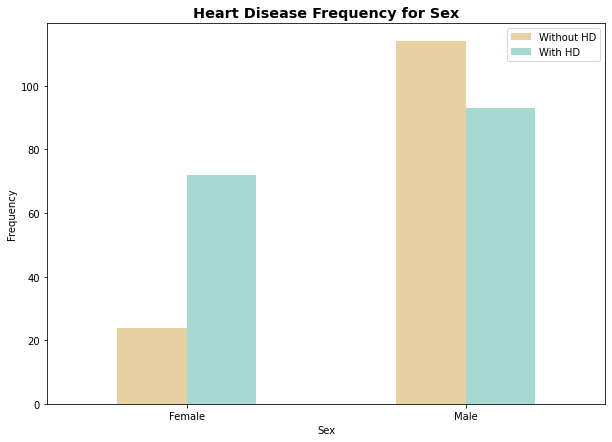

In [12]:
pd.crosstab(df.sex, df.target).plot(kind="bar",
                                   figsize=(10,7), 
                                   color=['#dbb972', '#76c6ba'],
                                   alpha=0.65)

plt.title('Heart Disease Frequency for Sex', fontweight='bold', fontsize='x-large')
plt.xlabel('Sex')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.ylabel('Frequency')
plt.legend(['Without HD', 'With HD'])

plt.show()

Once again, we can clearly see that we have more male patients in total, but we also have a higher proportion of female patients with heart diseases.

Now, let's look at the age distribution of patients.

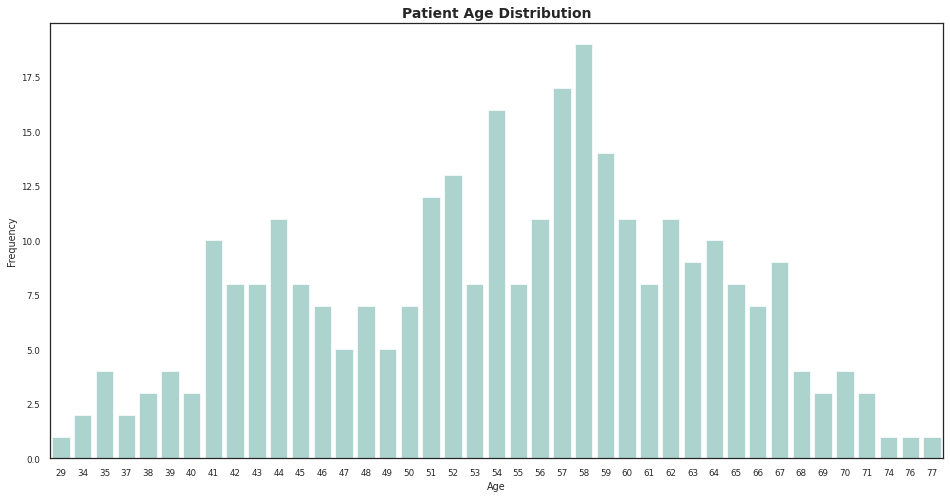

In [13]:
sns.set(rc={ 'figure.figsize':(16.0, 8.0) }, style='white',
        font_scale=0.8)


ax = sns.countplot(x='age', data=df, color='#76c6ba', alpha=0.65)
ax.set(xlabel="Age", ylabel="Frequency")
plt.title('Patient Age Distribution', fontweight='bold', fontsize='x-large')

plt.show()

We can see that we have a high percentage of patients in their 50s and very low percentage of them in their 20s and 30s, which makes sense since older age groups generally have higher risks of having a heart disease.

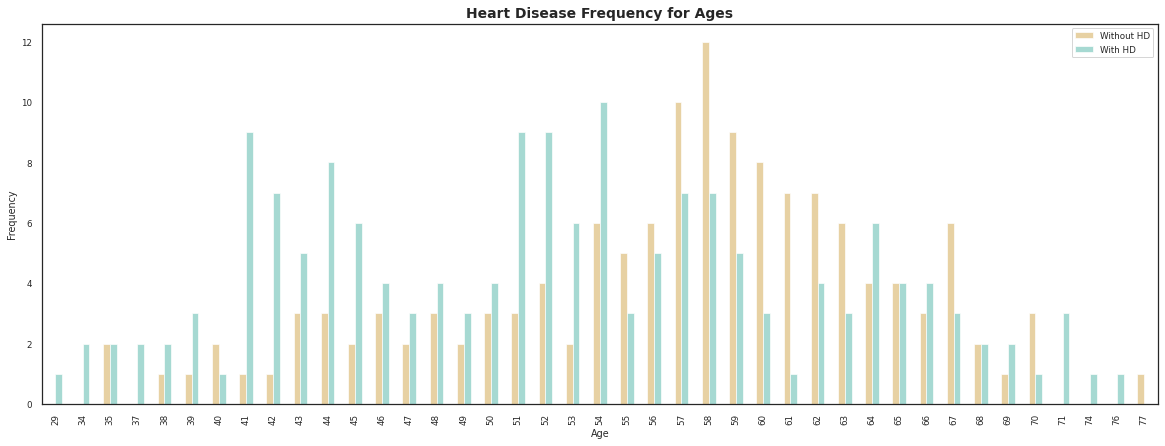

In [14]:
pd.crosstab(df.age, df.target).plot(kind="bar",
                                    figsize=(20,7), 
                                    color=['#dbb972', '#76c6ba'],
                                    alpha=0.65)

plt.title('Heart Disease Frequency for Ages', 
          fontweight='bold', 
          fontsize='x-large')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['Without HD', 'With HD'])

plt.show()

Interestingly, from this chart, we can notice that a fair amount of patients in their 40s were also diagnosed with a heart disease. 

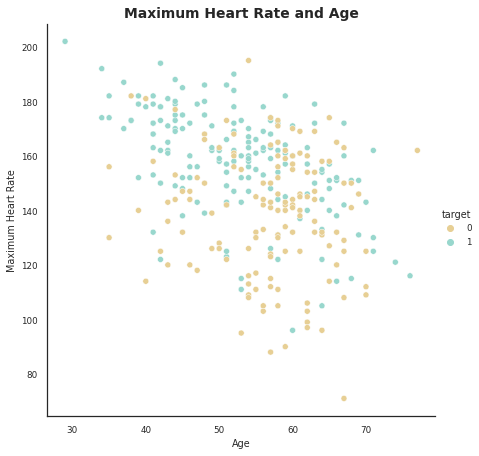

In [15]:
ax = sns.relplot(data=df, x="age", y="max_heart_rate_achieved", hue="target", 
                 palette="BrBG",
                 height=6)

ax.set(xlabel="Age", ylabel="Maximum Heart Rate")
plt.title('Maximum Heart Rate and Age', fontweight='bold', fontsize='x-large')
plt.show()

While the pattern is not completely clear from this dataset, the chart does show that patients with a heart disease tend to have slightly higher maximum heart rates.

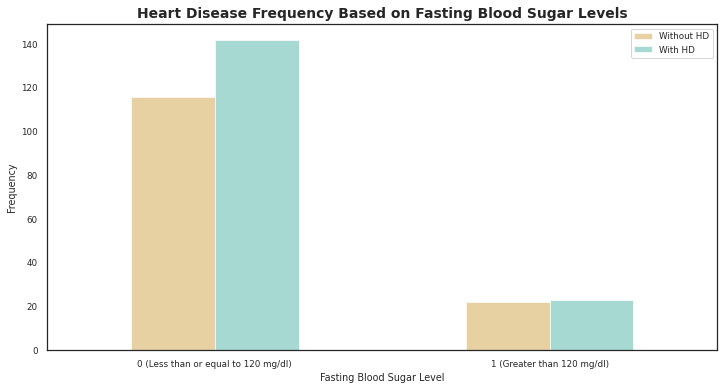

In [16]:
pd.crosstab(df.fasting_blood_sugar, df.target).plot(kind="bar",
                                                    figsize=(12,6),
                                                    color=['#dbb972','#76c6ba'],
                                                    alpha=0.65)

plt.title('Heart Disease Frequency Based on Fasting Blood Sugar Levels', fontweight='bold', 
          fontsize='x-large')
plt.xlabel('Fasting Blood Sugar Level')
plt.xticks(ticks=[0, 1], 
           labels=['0 (Less than or equal to 120 mg/dl)', '1 (Greater than 120 mg/dl)'], 
           rotation=0)
plt.ylabel('Frequency')
plt.legend(['Without HD', 'With HD'])

plt.show()

The chart above was also quite surprising because I assumed higher fasting blood sugar levels are naturally correlated with higher risk of having a heart disease. However, the chart does not seem to show such correlations, and instead suggests the opposite is true. Once again, this may be due to small dataset size.

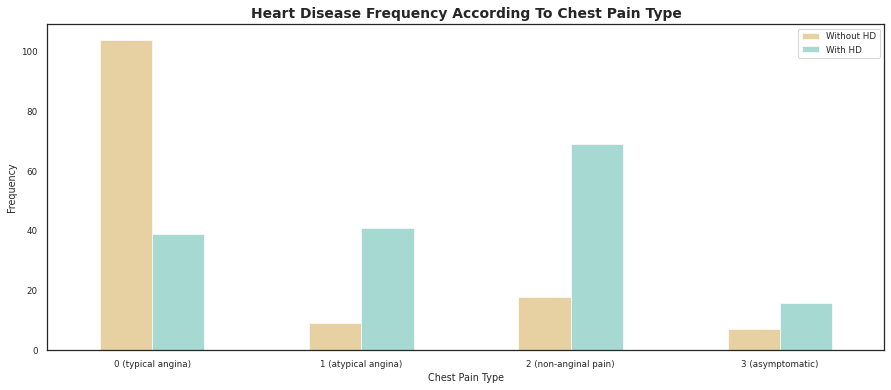

In [17]:
pd.crosstab(df.chest_pain_type, df.target).plot(kind="bar",
                                                figsize=(15,6),
                                                color=['#dbb972','#76c6ba'],
                                                alpha=0.65)

plt.title('Heart Disease Frequency According To Chest Pain Type', fontweight='bold', 
          fontsize='x-large')
plt.xlabel('Chest Pain Type')
plt.xticks(ticks=[0, 1, 2, 3], 
           labels=['0 (typical angina)', '1 (atypical angina)', 
                   '2 (non-anginal pain)', '3 (asymptomatic)'], 
           rotation=0)
plt.ylabel('Frequency')
plt.legend(['Without HD', 'With HD'])

plt.show()

This chart seems to suggests that having a chest pain type of 1, 2, or 3 increases probability of a heart disease and having type 0 decreases it. 

## 05. Data Preprocessing

About Dummy Coding:

https://datascience.stackexchange.com/questions/27957/why-do-we-need-to-discard-one-dummy-variable

https://stats.stackexchange.com/questions/115049/why-do-we-need-to-dummy-code-categorical-variables

https://www.statsmodels.org/dev/contrasts.html

In [18]:
print(df.dtypes)

# Change the following datatype into categorial variables / objects
df['sex'] = df['sex'].astype('object')
df['chest_pain_type'] = df['chest_pain_type'].astype('object')
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].astype('object')
df['rest_ecg'] = df['rest_ecg'].astype('object')
df['exercise_induced_angina'] = df['exercise_induced_angina'].astype('object')
df['st_slope'] = df['st_slope'].astype('object')
df['thalassemia'] = df['thalassemia'].astype('object')

print("*"*50)
print(df.dtypes)

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object
**************************************************
age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia              

With these columns, we now create some dummy variables for those with object datatypes to better understand in-depth model analysis later on.

In [19]:
df = pd.get_dummies(df, drop_first=True)
print(df.columns)

Index(['age', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'st_depression', 'num_major_vessels',
       'target', 'sex_1', 'chest_pain_type_1', 'chest_pain_type_2',
       'chest_pain_type_3', 'fasting_blood_sugar_1', 'rest_ecg_1',
       'rest_ecg_2', 'exercise_induced_angina_1', 'st_slope_1', 'st_slope_2',
       'thalassemia_1', 'thalassemia_2', 'thalassemia_3'],
      dtype='object')


Here we can see the dummy variables. For example, the variable, "sex", which had 0/1 representing female/male, has turned into two variables sex_0 and sex_1 (sex_0: 1 and sex_1: 0 means the patient is female and vice versa). We don't need to normalize the data since we will be using algorithms based on patitioning.

In [20]:
# Get Y values
y = df["target"]

# Normalize and get X values
x = df.drop(['target'], axis=1)

With the X and Y values set to pass in, we split them into training and testing sets, as shown below:

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

# X values
print(x_train.head(), "\n")
print(x_test.head(), "\n")
print("*"*50)

# Y values
print(y_train, "\n")
print(y_test, "\n")

     age  resting_blood_pressure  ...  thalassemia_2  thalassemia_3
74    43                     122  ...              1              0
153   66                     146  ...              1              0
64    58                     140  ...              1              0
296   63                     124  ...              1              0
287   57                     154  ...              1              0

[5 rows x 19 columns] 

     age  resting_blood_pressure  ...  thalassemia_2  thalassemia_3
225   70                     145  ...              0              1
152   64                     170  ...              0              1
228   59                     170  ...              0              1
201   60                     125  ...              0              1
52    62                     130  ...              0              1

[5 rows x 19 columns] 

**************************************************
74     1
153    1
64     1
296    0
287    0
      ..
251    0
192    0
117    1
47

## 06. Model Creation and Prediction

Let's import all necessary packages.

In [22]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.ensemble import RandomForestClassifier  # for Random Forest Classifier
from sklearn.tree import DecisionTreeClassifier      # for using Decision Tree Algoithm
from sklearn import svm                              # for Support Vector Machine (SVM) Algorithm
from sklearn import metrics                          # for checking the model accuracy

### Support Vector Machine Model

In [ ]:
# Use Support Vector Machine
model = svm.SVC()

# Train the algorithm with training input and output data
model.fit(x_train, y_train) 

# Pass the testing data to the trained model for prediction
prediction = model.predict(x_test) 

print('The accuracy of the SVM Model is:', metrics.accuracy_score(prediction, y_test))

### Random Forest Classifier Model

In [23]:
model3 = RandomForestClassifier(n_estimators = 1000)

# Train the algorithm with training input and output data
model3.fit(x_train, y_train)

# Pass the testing data to the trained model for prediction
prediction = model3.predict(x_test) 

print('The accuracy of the Random Forest Classifier Model is', metrics.accuracy_score(prediction, y_test))

The accuracy of the Random Forest Classifier Model is 0.8688524590163934


We can see that our random forest classifier model has a higher accuracy than SVM does. We will be using this model to evaluate and analyze what exactly might be going on under the "black box".

### Evaluation: Area Under the Curve 

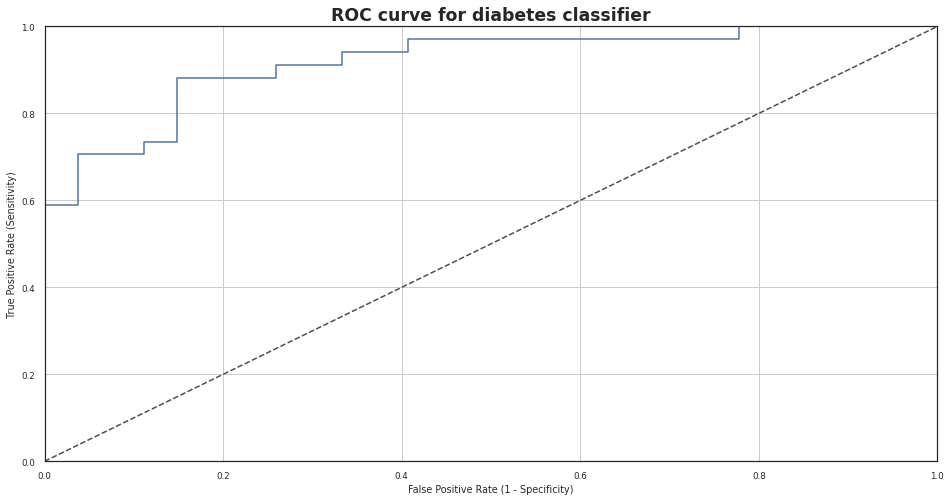

In [24]:
from sklearn.metrics import roc_curve, auc

y_pred_quant = model3.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier', 
          fontweight='bold', 
          fontsize='x-large')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [25]:
# Area under the curve
auc(fpr, tpr)

0.9183006535947712

### Evaluation: Sensitivity and Specificity

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, prediction)

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8518518518518519
Specificity :  0.8823529411764706


## Model Analysis

### Permutation Importance

In [27]:
!pip install -q eli5
!pip install -q shap
!pip install -q pdpbox

     |████████████████████████████████| 112kB 9.1MB/s 
     |████████████████████████████████| 327kB 9.6MB/s 
     |████████████████████████████████| 57.7MB 75kB/s 


In [29]:
import eli5 
from eli5.sklearn import PermutationImportance
import shap
from pdpbox import pdp, info_plots

perm = PermutationImportance(model3, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names=x_test.columns.tolist())

Weight,Feature
0.1180 ± 0.0601,num_major_vessels
0.0459 ± 0.0245,age
0.0361 ± 0.0382,thalassemia_3
0.0361 ± 0.0382,exercise_induced_angina_1
0.0361 ± 0.0245,thalassemia_2
0.0328 ± 0.0359,st_depression
0.0295 ± 0.0131,chest_pain_type_2
0.0262 ± 0.0393,max_heart_rate_achieved
0.0197 ± 0.0245,st_slope_2
0.0197 ± 0.0321,sex_1


From looking at the permutation importance chart, we can see that the most important feature to the model was "num_major_vessels". Moreover, features like "age", "thalassemia_2", "thalassemia_3", and "exercise_induced_angina_1" were also considered important. 

- "age" : age of patients
- "thalassemia_2" : fixed defect
- "thalassemia_3" : reversable defect
- "exercise_induced_angina_1" : True for exercise-induced angina


Let's take a look at how exactly the features are affecting our model's predictions.

### Partial Dependence Plots


In [30]:
base_features = df.columns.values.tolist()
base_features.remove('target')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


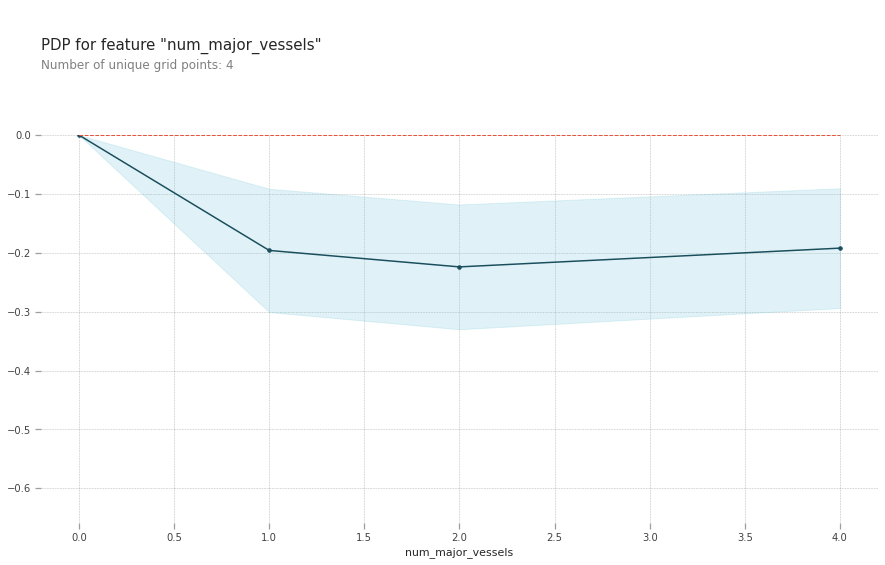

In [31]:
feat_name = 'num_major_vessels'
pdp_dist = pdp.pdp_isolate(model=model3, dataset=x_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

The PDP above highlights that having more major vessels **significantly decreases** the probability of a heart disease quite significantly. 

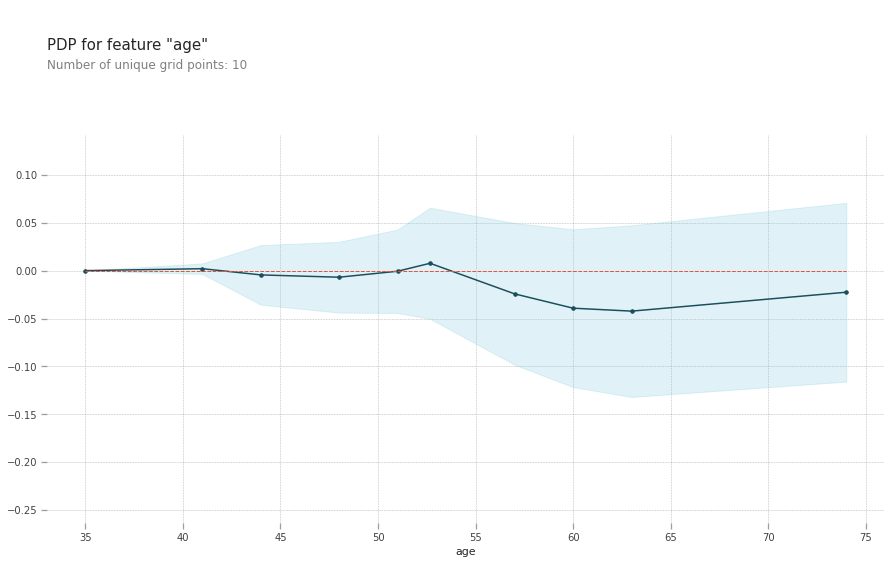

In [32]:
feat_name = 'age'
pdp_dist = pdp.pdp_isolate(model=model3, dataset=x_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

Firstly, the chart above has margins of error that makes it difficult to refine the exact effect of age. The bold line slightly shows an increased risk for patients who are around 53 year old and decreased risk for those older than that. However, this trend is highly likely due to the small sample size and should not be entirely trusted. 

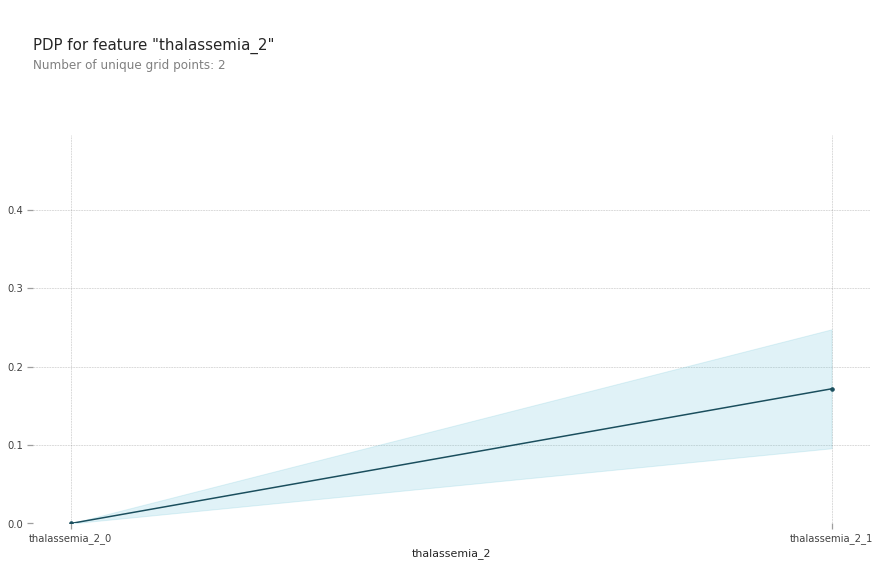

In [33]:
feat_name = 'thalassemia_2'
pdp_dist = pdp.pdp_isolate(model=model3, dataset=x_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

This PDP graph shows that patients who have Thalassemia type 2 (fixed defect) are **more likely** to have a heart disease. 

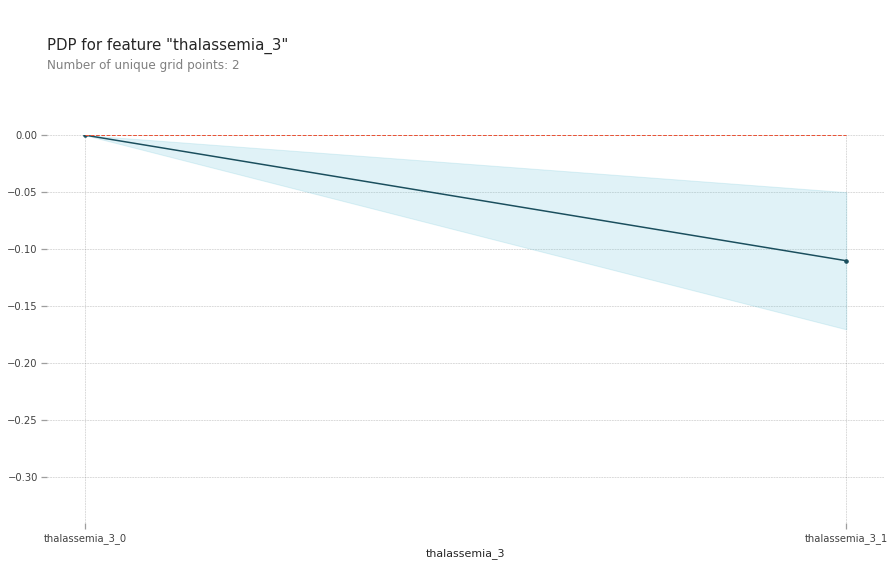

In [34]:
feat_name = 'thalassemia_3'
pdp_dist = pdp.pdp_isolate(model=model3, dataset=x_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

Contrastingly, this PDP suggests that patients who have Thalassemia type 3 (reversible defect) are **much less likely** to have a heart disease.

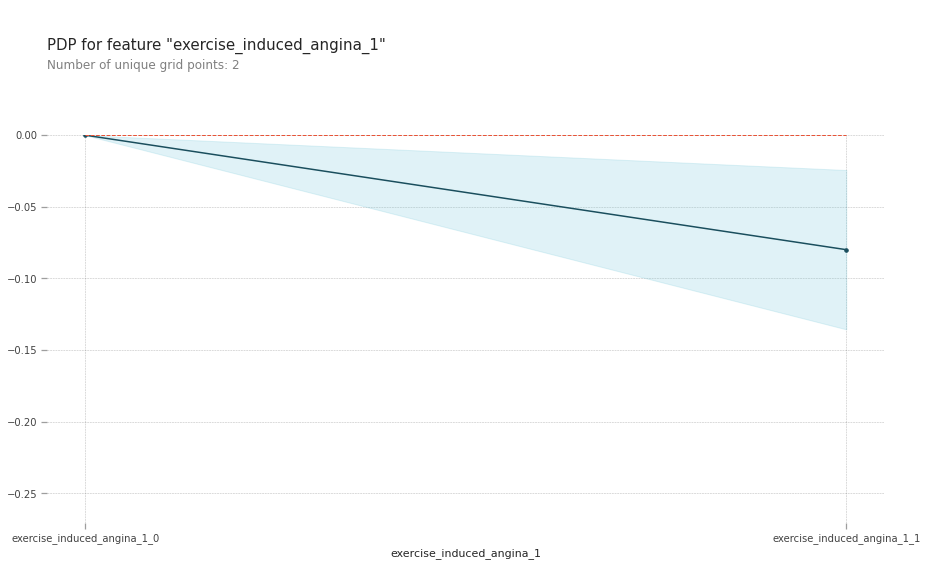

In [35]:
feat_name = 'exercise_induced_angina_1'
pdp_dist = pdp.pdp_isolate(model=model3, dataset=x_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

Here, patients with exercise-induced agina seems to have **lower** probability of having a heart disease. 

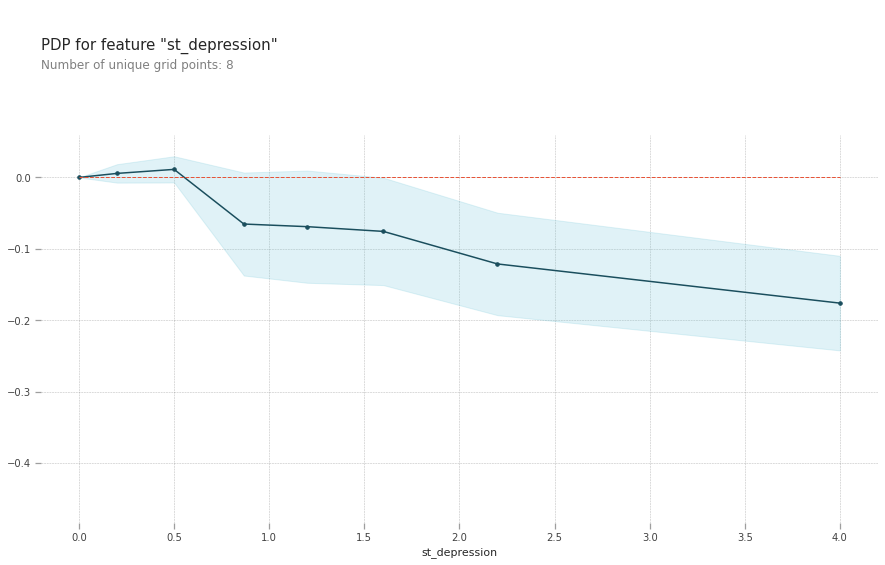

In [38]:
feat_name = 'st_depression'
pdp_dist = pdp.pdp_isolate(model=model3, dataset=x_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

Finally, an interesting PDP chart regarding ST-depression shows that values below 0.5 have slightly higher probabilities. Patients with values above 0.5, however, seems to have **significantly lower** chance of a heart disease. 

### SHAP (Shapely Additive Explanations) Values


In [36]:
# Pick one row for prediction
data_for_prediction = x_test.iloc[50,:].astype(float)

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model3)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

From looking at this chart of an anonymous patient, we can see that he or she has a significantly high probability of having a heart disease (91% compared the base value of 54.21%). The red features here act as "forces" that increase the probability whereas the blue features are ones that decrease it. Based on this chart, the patient currently has no major vessels, fixed thalassemia defect, high maximumm heart rate, and ST depression, all of which are high risk factors (according to the trained model here) of a heart disease. 

In [37]:
# Pick one row for prediction
data_for_prediction = x_test.iloc[4,:].astype(float)

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model3)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

On the other hand, we can see from this patient that there are number of factors that decrease the probability of having a heart disease. He or she has three major vessels, reversible thalassemia defect, and low maximum heart rate achieved. With this combination of features, the patient has a very low probability of suffering from a heart disease (9% compared to the base value of 54.21%)

In [53]:
# Pick one row for prediction
data_for_prediction = x_test.iloc[29,:].astype(float)

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model3)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

This chart has a fair balance of features that increase and decrease the likelihood of a heart disease. 